## Data Ingestion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np
import seaborn as  sns

In [2]:
path  =  '/content/Mall_Customers.csv'

In [3]:
df  =  pd.read_csv(path)

### Basic Checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.rename(columns  =  {'Annual Income (k$)' : 'Annual Income' , "Spending Score (1-100)" :  'Spending Score'} , inplace  = True)

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

In [19]:
x  =  df[['Age', 'Annual Income', 'Spending Score']]

In [20]:
x.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


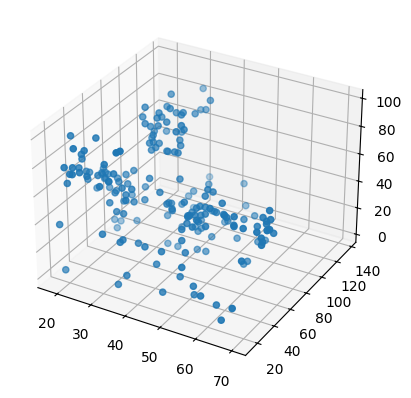

In [21]:
ax  =  plt.axes(projection='3d')
x1  =  x["Age"]
y  =  x["Annual Income"]
z  =  x["Spending Score"]
ax.scatter(x1 ,  y , z)

### create  pipeline  to preprocess data

In [22]:
from sklearn.pipeline  import Pipeline
from sklearn.impute  import SimpleImputer
from  sklearn.preprocessing import StandardScaler

In [23]:
num_pipeline =  Pipeline(steps = [('imputer' ,  SimpleImputer(strategy  =  'mean')) ,  ('scaler' ,  StandardScaler())])

In [24]:
x_scaled  =  num_pipeline.fit_transform(x)
x_scaled =  pd.DataFrame(x_scaled  , columns =  x.columns)

In [25]:
x_scaled.head()

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


# Model fitting

In [27]:
from sklearn.cluster import AgglomerativeClustering
agc  =  AgglomerativeClustering( n_clusters= 6  )
agc.fit(x_scaled)

AgglomerativeClustering(n_clusters=6)

In [28]:
label  =  agc.labels_

In [29]:
label

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

/tmp/ipython-input-1687750600.py:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkages  =  linkage(DM)


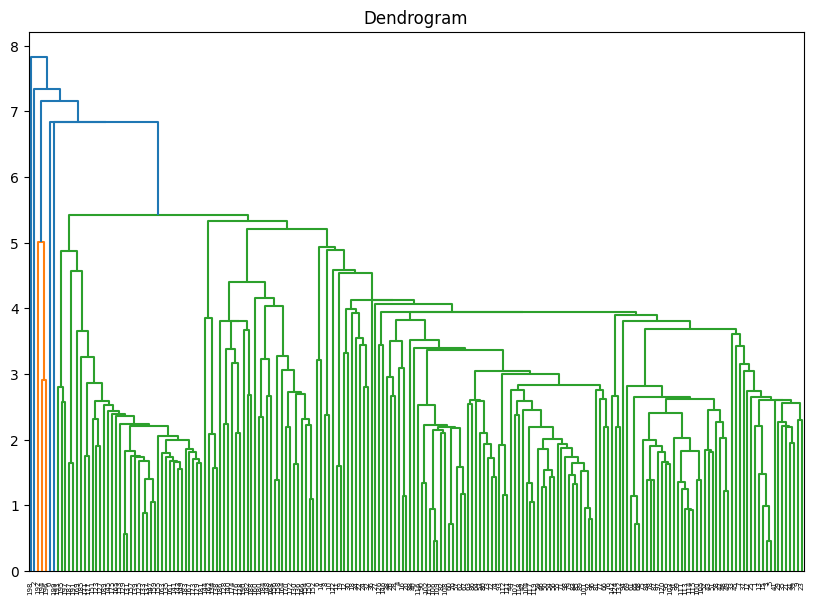

In [32]:
from scipy.spatial import distance_matrix
DM =  distance_matrix(x_scaled  , x_scaled)
from scipy.cluster.hierarchy import linkage , dendrogram
linkages  =  linkage(DM)
plt.figure(figsize=(10 , 7))
plt.title('Dendrogram')
a  =  dendrogram(linkages)


In [33]:
x_scaled

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [34]:
label

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [35]:
x_scaled['label'] = label

In [36]:
x_scaled

,Age,Annual Income,Spending Score,label
0,-1.424569,-1.738999,-0.434801,4
1,-1.281035,-1.738999,1.195704,5
2,-1.352802,-1.700830,-1.715913,4
3,-1.137502,-1.700830,1.040418,5
4,-0.563369,-1.662660,-0.395980,4
...,...,...,...,...
195,-0.276302,2.268791,1.118061,2
196,0.441365,2.497807,-0.861839,3
197,-0.491602,2.497807,0.923953,2
198,-0.491602,2.917671,-1.250054,3


In [38]:
type(label)

numpy.ndarray

In [39]:
np.unique(label)

array([0, 1, 2, 3, 4, 5])

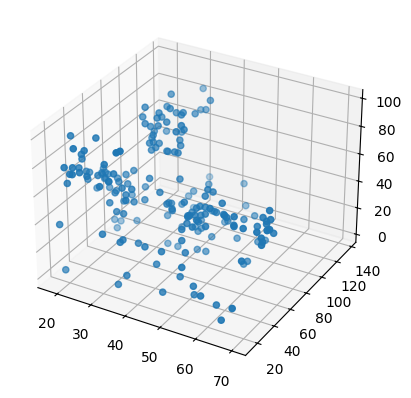

In [40]:

ax  =  plt.axes(projection='3d')
x1  =  x["Age"]
y  =  x["Annual Income"]
z  =  x["Spending Score"]
ax.scatter(x1 ,  y , z)

### Sihoutte  score to check  performance  of  clusters

In [41]:
from  sklearn.metrics  import silhouette_score

In [54]:
agc1  =  AgglomerativeClustering(n_clusters= 6)
# agc1.fit(x_scaled)
predict = agc1.fit_predict(x_scaled)
score  =  silhouette_score(x_scaled  ,  predict)

In [55]:
print("Average silhoutte  score" ,  score)

Average silhoutte  score 0.583573039677007


In [57]:
def  plotcolor(ar):
  cols  = []
  for  i in ar:
    if i==0:
      cols.append('red')
    elif i==1:
      cols.append('green')
    elif i==2:
      cols.append('orange')
    elif i== 3:
      cols.append('yellow')
    elif i==4:
      cols.append('purple')
    else:
      cols.append('pink')
  return  cols

In [58]:
colors  =  plotcolor(label)

In [59]:
colors

['purple',
 'pink',
 'purple',
 'pink',
 'purple',
 'pink',
 'purple',
 'pink',
 'purple',
 'pink',
 'purple',
 'pink',
 'purple',
 'pink',
 'purple',
 'pink',
 'purple',
 'pink',
 'purple',
 'pink',
 'purple',
 'pink',
 'purple',
 'pink',
 'purple',
 'pink',
 'purple',
 'red',
 'purple',
 'pink',
 'purple',
 'pink',
 'purple',
 'pink',
 'purple',
 'pink',
 'purple',
 'pink',
 'purple',
 'pink',
 'green',
 'pink',
 'purple',
 'red',
 'purple',
 'pink',
 'green',
 'red',
 'red',
 'red',
 'green',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'green',
 'green',
 'red',
 'green',
 'green',
 'green',
 'red',
 'red',
 'green',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'red',
 'red',
 'red',
 'green',
 'green',
 'red',
 'green',
 'green',
 'red',
 'green',
 'green',
 'red',
 'red',
 'green',
 'green',
 'red',
 'green',
 'red',
 'red',
 'red',
 'green',
 'red',
 'green',
 'red',
 'red',
 'green',
 'green',
 'red',
 'green',
 'red',

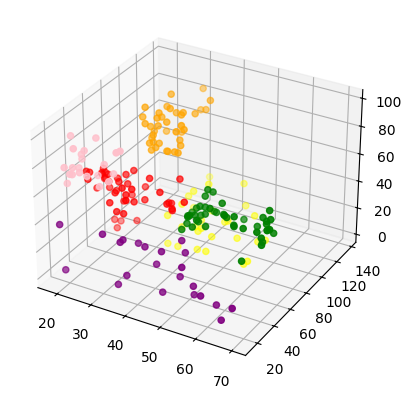

In [60]:

ax  =  plt.axes(projection='3d')
x1  =  x["Age"]
y  =  x["Annual Income"]
z  =  x["Spending Score"]
ax.scatter(x1 ,  y , z  , c  =  colors)